In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.13.1


In [3]:
mninst = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mninst.load_data()

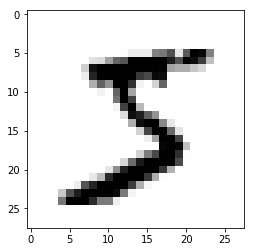

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [5]:
#Creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))

In [6]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [8]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 75us/sample - loss: 12.8499 - acc: 0.2026
Epoch 2/3
60000/60000 [==============================] - 4s 67us/sample - loss: 12.1640 - acc: 0.2452
Epoch 3/3
60000/60000 [==============================] - 4s 70us/sample - loss: 11.7365 - acc: 0.2717


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 11.4906 - acc: 0.2871


In [12]:
print(val_loss, val_acc)

11.490590267944336 0.2871


In [13]:
model.save('epic_num_reader.model')

In [14]:
new_model= tf.keras.models.load_model('epic_num_reader.model')

In [15]:
predictions = new_model.predict([x_test])
print(predictions)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
import numpy as np
print(np.argmax(predictions[0]))

4


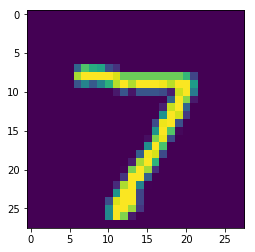

In [17]:
plt.imshow(x_test[0])
plt.show()